<ipython-input-6-c59c7823adb6>:11: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("/content/preprocessed_train_data (1).csv")
<ipython-input-6-c59c7823adb6>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[target_col].fillna(train_df[target_col].mode()[0], inplace=True)


Original Target Distribution:
cluster_catgeory
1      188983
4      172434
6      169211
2      155060
5       33349
3       27405
99          1
95          1
98          1
100         1
89          1
Name: count, dtype: int64

Adjusted Target Distribution:
cluster_catgeory
0      344043
2      172434
4      169211
3       33349
1       27405
99          1
95          1
98          1
100         1
89          1
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68662
           1       1.00      1.00      1.00      5436
           2       1.00      1.00      1.00     34431
           3       1.00      1.00      1.00      6606
           4       1.00      1.00      1.00     34153
          95       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1

    accuracy                           1.00    149290
   macro avg       0.71      0.71      0.71    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


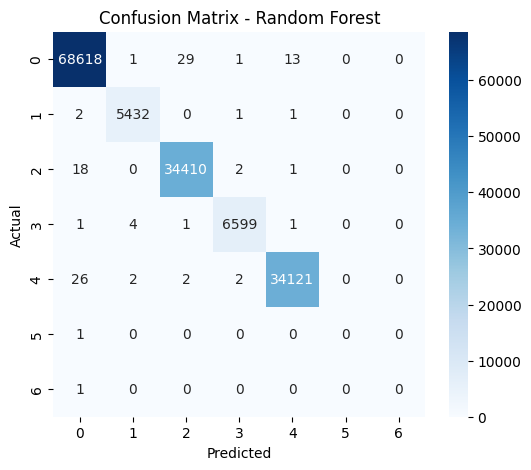


Predicted Clusters for Test Dataset:
   Customer_ID  Predicted_cluster
0        33574                  0
1        10089                  0
2        38329                  2
3        11376                  0
4        12410                  2
5          826                  0
6        10364                  2
7        39986                  0
8        11133                  0
9        32747                  0


In [6]:
# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_df = pd.read_csv("/content/preprocessed_train_data (1).csv")
test_df = pd.read_csv("/content/preprocessed_test_data (1).csv")

# Step 4: Encode 'outlet_city'
combined_cities = pd.concat([train_df["outlet_city"], test_df["outlet_city"]], axis=0).astype(str)
city_encoder = LabelEncoder()
city_encoder.fit(combined_cities)

train_df["outlet_city"] = city_encoder.transform(train_df["outlet_city"].astype(str))
test_df["outlet_city"] = city_encoder.transform(test_df["outlet_city"].astype(str))

# Step 5: Clean and Convert Target Column
target_col = "cluster_catgeory"

# Handle missing values
train_df[target_col].fillna(train_df[target_col].mode()[0], inplace=True)

# Extract only numeric digits from strings if necessary
train_df[target_col] = train_df[target_col].astype(str).str.extract(r'(\d+)')[0]
train_df = train_df[train_df[target_col].notna()]
train_df[target_col] = train_df[target_col].astype(int)

# Check the distribution of classes in the target variable
print("Original Target Distribution:")
print(train_df[target_col].value_counts())

# Step 5.1: Adjust target to have 6 clusters (if necessary)
# Adjust or combine classes to have only 6 clusters
train_df[target_col] = train_df[target_col].replace({
    1: 0,  # Example: Grouping class 1 into class 0
    2: 0,  # Example: Grouping class 2 into class 0
    3: 1,  # Grouping class 3 into class 1
    4: 2,  # Grouping class 4 into class 2
    5: 3,  # Grouping class 5 into class 3
    6: 4,  # Grouping class 6 into class 4
    7: 5,  # Grouping class 7 into class 5
    8: 5   # Grouping class 8 into class 5
})

# Verify the new class distribution
print("\nAdjusted Target Distribution:")
print(train_df[target_col].value_counts())

# Step 6: Feature Scaling (MinMaxScaler)
scaler = MinMaxScaler()
numeric_features = ['luxury_sales', 'fresh_sales', 'dry_sales']
train_df[numeric_features] = scaler.fit_transform(train_df[numeric_features])
test_df[numeric_features] = scaler.transform(test_df[numeric_features])

# Step 7: Define Features and Target
X = train_df.drop(columns=["Customer_ID", target_col])
y = train_df[target_col]

# Step 8: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 10: Evaluate Model on Validation Set
y_val_pred = rf_model.predict(X_val)
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: Predict on Test Data
X_test = test_df.drop(columns=["Customer_ID"])
test_predictions = rf_model.predict(X_test)
test_df["Predicted_cluster"] = test_predictions

# Step 12: Display Predictions
print("\nPredicted Clusters for Test Dataset:")
print(test_df[["Customer_ID", "Predicted_cluster"]].head(10))

# Save to CSV
output_filename = "predicted_clusters.csv"
test_df[["Customer_ID", "Predicted_cluster"]].to_csv(output_filename, index=False)
print(f"\nPredicted clusters saved to: {output_filename}")



In [7]:
# Save to CSV
output_filename = "predicted_clusters.csv"
test_df[["Customer_ID", "Predicted_cluster"]].to_csv(output_filename, index=False)
print(f"\nPredicted clusters saved to: {output_filename}")


Predicted clusters saved to: predicted_clusters.csv
